<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from my_custom_utils import data_preparation,important_features_visualization_linear,feature_selection_linear

%matplotlib inline
sns.set(style='darkgrid', rc={'figure.figsize':(10,6)})

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [ ]:
df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')
df.shape

(920, 21)

# Data Preparation

* Preparing the data using the imported `data_preparation()` function.
```Python
    def data_preparation(data):
  """This funtion is for data preparation which returns the clean data. In order to do this, it drops the unnecessay columns and sets the index. 
  Then it encodes the categorical non-numeric data into numeric data using label encoder.
  Input:
      data: The dataframe.
  
  Output:
      Concatenation of encoded and numeric data.
  """
  data=data.drop(['Timestamp','Unnamed: 20'],axis=1)
  data=data.set_index('Which year are you in?')
  data_numeric=data.drop(data.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
  data_non_numeric=data.drop(data.iloc[:, [1,3,7,17]],axis=1)
  le=LabelEncoder()
  encode=data_non_numeric.apply(le.fit_transform)

  return pd.concat([encode,data_numeric],axis=1)
```

In [ ]:
data_final=data_preparation(df)
data_final.shape

(920, 18)

# Feature Selection

* Visualizing the important features using the imported `important_features_visualization_linear()` function.
```Python
def important_features_visualization_linear(data):
  """This function plots the importance features using mutual information regression. It is only for Linear_Regression.ipynb.

  Input:
      data: The dataframe.
  
  Output:
      Plots a horizontal bar chart of the important features in a descending order.
  """
  X=data.drop('On a scale of 1-100, how would you express this feeling?',axis=1)
  y=data['On a scale of 1-100, how would you express this feeling?']
  imp=mutual_info_regression(X,y)
  feat_imp=pd.Series(imp,data.columns[0:len(data.columns)-1])
  feat_imp.sort_values(ascending=False).plot(kind='barh',color='teal',figsize=(20,10))
  plt.show()
```

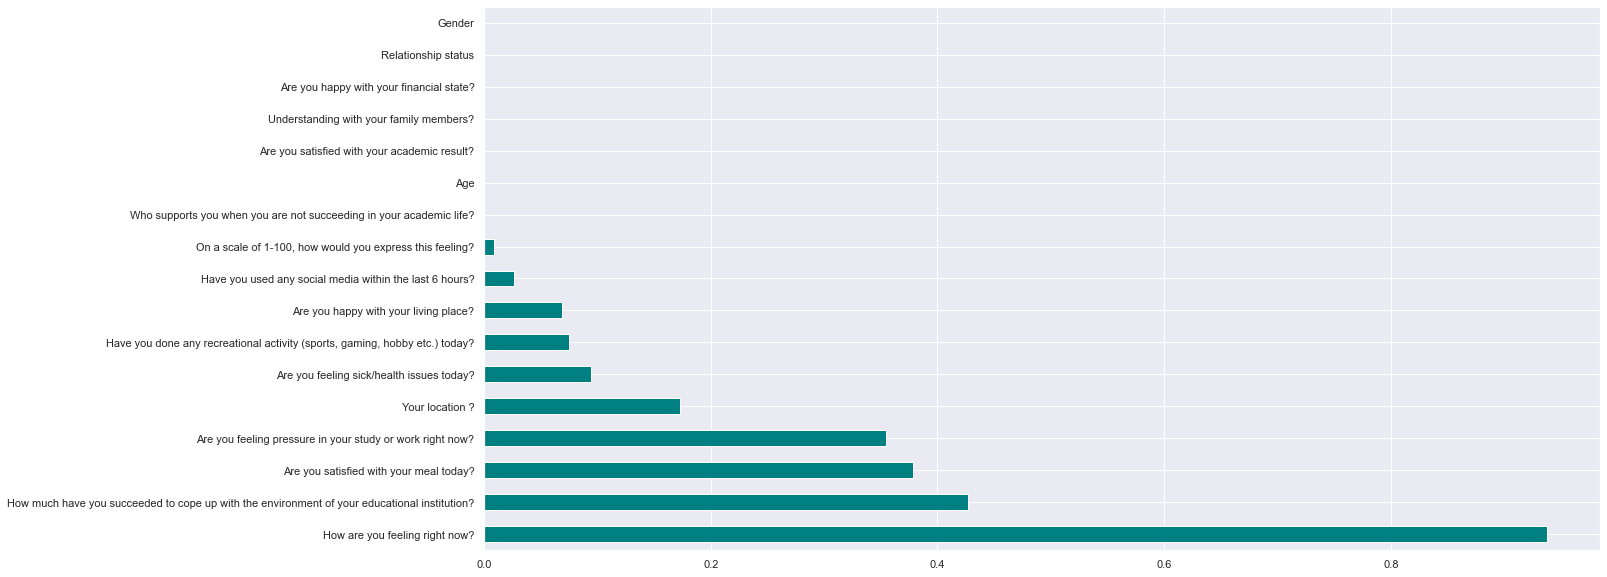

In [ ]:
imp_feat_vis=important_features_visualization_linear(data_final)
imp_feat_vis

* Finding the important features using the imported `feature_selection_linear()` function.
```Python
def feature_selection_linear(data):
  """This function finds the important features using mutual information regression under a percentile value. It is only for Linear_Regression.ipynb.

  Input:
      data: The dataframe.
  
  Output:
      Returns the top important features under 30 percentiles.
  """
  X=data.drop('On a scale of 1-100, how would you express this feeling?',axis=1)
  y=data['On a scale of 1-100, how would you express this feeling?']
  select=SelectPercentile(mutual_info_regression,percentile=30)
  select.fit(X,y)

  return X.columns[select.get_support()]
```

In [ ]:
important_features=feature_selection_linear(data_final)
important_features

Index(['How are you feeling right now?', 'Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

# Splitting the Data based on the Feature Selection

In [ ]:
X=data_final[['How long did you sleep last night?(in hours)', 'How are you feeling right now?', 'Are you satisfied with your meal today?', 'Your location ?', 'Are you feeling pressure in your study or work right now?']].values
y=data_final['On a scale of 1-100, how would you express this feeling?'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21)

# Linear Regression from Scratch

### <span style='color:green'>***Step-1***</span>***:*** <span style='color:red'>***Initialize the Parameters which are weight and bias***</span>

In [ ]:
def initialize_parameters(lenw):
    """The numpy.random.randn() function creates an array of specified shape and fills it with random values as per standard 
    normal distribution.
    
    Arg: 
       lenw: n numbers of training samlple i.e. X_train.shape[0]
    Returns:
          weight and bias
    """
    w=np.random.randn(1, lenw)
    b=0
    return w, b

### <span style='color:green'>***Step-2***</span>***:*** <span style='color:red'>***Forward Propagation***</span>

In [ ]:
def forward_prop(X, w, b):
    """A linear function or prediction function which is the matrix multiplication of the training samples and weights and then 
    sum up the bias.
    
    Args:
        X: X_train
        w, b: weights and bias from the step 1.
    Returns:
          z: The result of the calculation
    """
    y_pred=np.dot(w, X)+b
    return y_pred

### <span style='color:green'>***Step-3***</span>***:*** <span style='color:red'>***Cost Function***</span>

In [ ]:
def cost_function(y_pred, y):
    """Cost function  is (1/2) of mean squared error.
    
    Args:
        y_pred: Prediction funtion
        y: True value
    Returns: 
        J: Cost function
    """
    m=y.shape[1]
    J=(1/(2*m))*np.sum(np.square(y_pred-y))
    return J

### <span style='color:green'>***Step-4***</span>***:*** <span style='color:red'>***Backward Propagation***</span>

In [ ]:
# row vector mul with col vec. (1xm)x(mxn)=(1xn). Rows are transposed into cols
def back_prop(X, y, y_pred):
    """Finds the derivative of weight's and bias's.
    
    Args:
        X: Independent variables
        y: Dependent variables
        y_pred: Found from prediction function
    Returns:
        dw, db: Derivative of weight's and bais's
    """
    m=y.shape[1]
    dy_pred=(1/m)*(y_pred-y)
    dw=np.dot(dy_pred, X.T)
    db=np.sum(dy_pred)
    return dw, db

### <span style='color:green'>***Step-5***</span>***:*** <span style='color:red'>***Gradient Descent***</span>

In [ ]:
def gradient_descent(w, b, dw, db, lr):
    """Update of weight and bias.
    
    Args:
        w, b, dw, db, lr: Old weights and bias's with their derivatives and learning rate(lr)
    Returns:
        w, b: Updated weight and bias
    """
    w=w-lr*dw
    b=b-lr*db
    return w, b

### <span style='color:green'>***Step-6***</span>***:*** <span style='color:red'>***Putting it altogether: Final Model***</span>

In [ ]:
def linear_regression_model(X_train, y_train, X_test, y_test, lr, epochs):
    """This function puts all the 5 steps altogether and builds the linear regreesion model from scratch.
    
    Args:
       Training and testing data with a learning rate(lr) and iteration(epochs)
    Returns:
        Training and testing costs and mean absolute errors and also plots them.
    """
    lenw=X_train.shape[0]
    w, b=initialize_parameters(lenw) #step1
    costs_train=[]
    costs_test=[]
    MAEs_train=[]
    MAEs_test=[]
    m_train=y_train.shape[1]
    m_test=y_test.shape[1]
    
    for i in range(1, epochs+1):
        #training set
        y_pred_train=forward_prop(X_train, w, b) #step2
        cost_train=cost_function(y_pred_train, y_train) #step3
        dw, db=back_prop(X_train, y_train, y_pred_train) #step4
        w, b=gradient_descent(w, b, dw, db, lr) #step5
        
        if i%10==0:
            costs_train.append(cost_train)
        MAE_train=(1/m_train)*np.sum(np.abs(y_pred_train-y_train))
        if i%10==0:
            MAEs_train.append(MAE_train)
        
        #testing set
        y_pred_test=forward_prop(X_test, w, b)
        cost_test=cost_function(y_pred_test, y_test)
        if i%10==0:
            costs_test.append(cost_test)
        MAE_test=(1/m_test)*np.sum(np.abs(y_pred_test-y_test))
        if i%10==0:
            MAEs_test.append(MAE_test)
        
        print('Epochs '+str(i)+' /'+str(epochs)+': ')
        print('Training Cost '+str(cost_train)+'|'+' Testing Cost '+str(cost_test))
        print('Training MAE '+str(MAE_train)+'|'+' Testing MAE '+str(MAE_test))
    
    plt.plot(costs_train, color='orange', label='Training Cost')
    plt.plot(costs_test, color='blue', label='Testing Cost')
    plt.xlabel('Iterations (per 10)', fontsize=18)
    plt.ylabel('Cost', fontsize=18)
    plt.title('Learning Rate '+str(lr), fontsize=18)
    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.show();
    
    plt.plot(MAEs_train, color='orange', label='Training Mean Absolute Error')
    plt.plot(MAEs_test, color='blue', label='Testing Mean Absolute Error')
    plt.xlabel('Iterations (per 10)', fontsize=18)
    plt.ylabel('Mean Squared Error', fontsize=18)
    plt.title('Learning Rate '+str(lr), fontsize=18)
    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.show();

# Scaling the Independent Features

In [ ]:
def normalize(X):
    """Scaling the independent variables.
    
    Arg:
       X: Training and testing independent variables
    Returns:
       Normalized variables
    """
    X=(X-X.mean())/(X.max()-X.min())
    return X

In [ ]:
X_train=normalize(X_train)
X_test=normalize(X_test)

# Reshaping the Data for the Model

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((736, 5), (736,), (184, 5), (184,))

In [ ]:
def reshaping(train_x, train_y, test_x, test_y):
    """For my Linear Regression model, it requires X_train, X_test=(n_features x n_training_samples) and
                                                   y_train, y_test=(1 x m_train where m_train=n_training_samples)
    So I have to reshaping the data.
    
    Args:
        Takes the training and testing samples
    Returns:
        Reshaped data
    """
    train_x=train_x.T
    train_y=np.array([train_y])
    test_x=test_x.T
    test_y=np.array([test_y])
    
    return train_x, train_y, test_x, test_y

In [ ]:
X_train, y_train, X_test, y_test=reshaping(X_train, y_train, X_test, y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5, 736), (1, 736), (5, 184), (1, 184))

# Calling the Raw Model

Epochs 1 /300: 
Training Cost 2311.372000956946| Testing Cost 898.9376911780128
Training MAE 58.23354951282519| Testing MAE 35.83829041406213
Epochs 2 /300: 
Training Cost 953.4107666396987| Testing Cost 565.2854878564694
Training MAE 37.44366319309247| Testing MAE 30.266891125067065
Epochs 3 /300: 
Training Cost 596.7731341273594| Testing Cost 476.01376602157484
Training MAE 31.174448737962834| Testing MAE 27.709806881996485
Epochs 4 /300: 
Training Cost 496.346781534044| Testing Cost 446.99333961495074
Training MAE 28.294367795471622| Testing MAE 26.273282245755293
Epochs 5 /300: 
Training Cost 461.8059035274857| Testing Cost 432.47707743745497
Training MAE 26.674794328153666| Testing MAE 25.444358195876827
Epochs 6 /300: 
Training Cost 444.5191881273394| Testing Cost 421.41288967531125
Training MAE 25.732479055389962| Testing MAE 24.92291210045685
Epochs 7 /300: 
Training Cost 432.04538797000475| Testing Cost 411.2855748924572
Training MAE 25.153628205027385| Testing MAE 24.52567601

Epochs 146 /300: 
Training Cost 204.37934588491842| Testing Cost 201.74418010534038
Training MAE 14.779929260799616| Testing MAE 14.824949098485206
Epochs 147 /300: 
Training Cost 204.30646720155934| Testing Cost 201.726673714577
Training MAE 14.774411756490789| Testing MAE 14.820640713720634
Epochs 148 /300: 
Training Cost 204.23452434675218| Testing Cost 201.70995448214458
Training MAE 14.768997410573167| Testing MAE 14.816444044081095
Epochs 149 /300: 
Training Cost 204.1634897009207| Testing Cost 201.69399409859147
Training MAE 14.763683733955265| Testing MAE 14.812356300199124
Epochs 150 /300: 
Training Cost 204.0933368444662| Testing Cost 201.67876546719913
Training MAE 14.758482326012555| Testing MAE 14.808374761807539
Epochs 151 /300: 
Training Cost 204.0240405009537| Testing Cost 201.6642426481943
Training MAE 14.753471884983728| Testing MAE 14.80449677603193
Epochs 152 /300: 
Training Cost 203.95557648303918| Testing Cost 201.65040080560127
Training MAE 14.748554256795234| Te

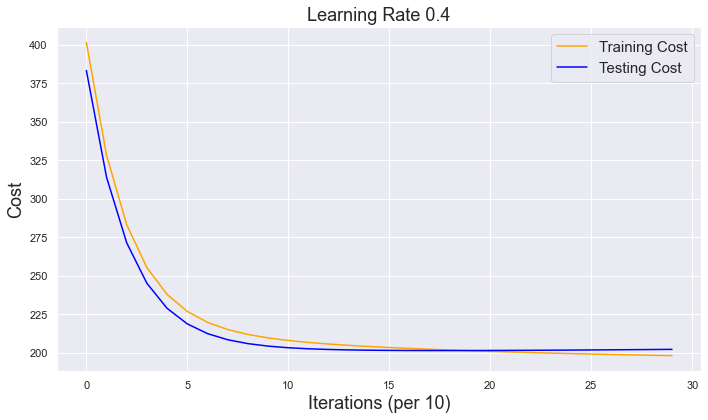

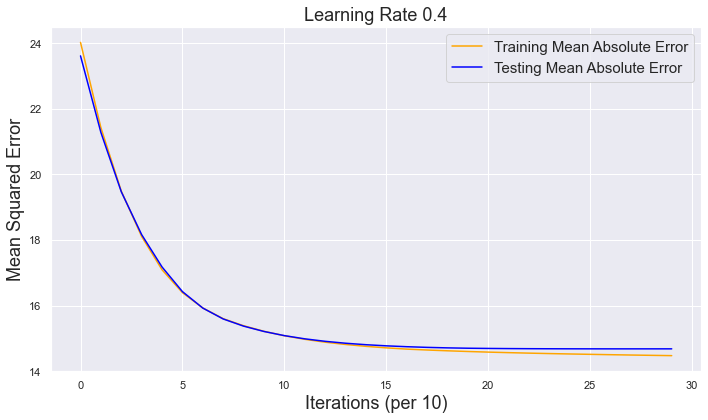

In [ ]:
linear_regression_model(X_train, y_train, X_test, y_test, lr=0.4, epochs=300)

# Comparison between the Implemented Raw Model and Sklearn Built-in Model

In [ ]:
def sklearn_linear_regression(x_train, y_train, x_test, y_test):
    """This function is for creating the model using the bult-in function in sklearn.
    
    Args:
        Training and testing data
    Returns:
        Mean Squared Error for training and testing
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error
    model=LinearRegression()
    model.fit(x_train.T, y_train.T)
    predictions_train=model.predict(x_train.T)
    predictions_test=model.predict(x_test.T)
    MAE_sklearn_train=mean_absolute_error(predictions_train, y_train.T)
    MAE_sklearn_test=mean_absolute_error(predictions_test, y_test.T)
    
    print('Mean Absolute Error in training using sklearn: '+str(MAE_sklearn_train))
    print('Mean Absolute Error in testing using sklearn: '+str(MAE_sklearn_test))

In [ ]:
sklearn_linear_regression(X_train, y_train, X_test, y_test)

Mean Absolute Error in training using sklearn: 14.423425111348765
Mean Absolute Error in testing using sklearn: 14.888571207633479
